In [10]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%config InlineBackend.figure_format = 'retina'


# @title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label, interact_manual
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")



with open('slice_data.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)


data = raw_data['PPC_RS']
n_column = data.iloc[0,:].size
starting_index = np.arange (1,n_column+1, 15)
cell_list = []

#separate the cells from one sheet

for i in starting_index:
    cell_data = data.iloc[:,i:i+13]
    cell_list.append(cell_data)


clamp_levels = data.iloc[0,1:14]
clamp_levels_string = pd.Series(clamp_levels, dtype="string")
col_list = list(clamp_levels_string)

In [11]:
def into_dict(data):
    n_column = data.iloc[0,:].size
    starting_index = np.arange (1,n_column+1, 15)

    cell_list = []
    clamp_levels = data.iloc[0,1:14]
    clamp_levels_string = pd.Series(clamp_levels, dtype="string")
    col_label = list(clamp_levels_string)


    #separate the cells from one sheet

    for i in starting_index:
        cell_data = data.iloc[:,i:i+13]
        cell_list.append(cell_data)

    num_neuron = len(cell_list)
    cell_id_list = []


    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)


    num_neuron = len(cell_list)
    cell_id_list = []
    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)
        sheet_time = data.iloc[1:,0]


    for i in range(num_neuron):
        cell_list[i].columns = col_label
        cell_list[i] = cell_list[i].iloc[1:,:]


    cell_dic = {}

    cell_dic['time'] = sheet_time
    cell_dic['data'] = cell_list
    cell_dic['cell_id'] =  cell_id_list

    return cell_dic

In [12]:
ppc_rs = into_dict(raw_data['PPC_RS'])
acc_rs = into_dict(raw_data['ACC_RS'])

acc_fs = into_dict(raw_data['ACC_FS'])
ppc_fs = into_dict(raw_data['PPC_FS'])

In [13]:
#compare the membrane potetials of ppc and pfc 


# bring the ppc data 


def overlap_mp(input_data, start, end, trial_num, point_idx):

    for i in range(trial_num):
        
        plt.plot(input_data['time'][start:end], input_data['data'][i]['-200.0'][start:end], 'c', alpha = 0.3, linewidth= 2)
        plt.plot(input_data['time'][start:end], input_data['data'][point_idx]['-200.0'][start:end], 'r', alpha = 0.7, linewidth= 2)
        
        
    plt.ylabel('memrane potential (mV)')
    plt.xlabel('time (ms)')
    plt.show()


In [14]:
# remove one item first and second, and third 

def remove_cell(data_set, remove_list):
    
    # sort the index based on order 
    
    remove_list.sort()
    
    num_deleted = 0
    
    for i in remove_list:
        i = i - num_deleted
        data_set['data'].pop(i)
        data_set['cell_id'].pop(i)
        num_deleted += 1
        print(num_deleted)
    
    return data_set
    
    

In [15]:
remove_list = [0, 5, 10]

In [16]:
_= remove_cell(acc_rs, remove_list)

1
2
3


In [20]:
def before_sweep(input_data, start, end):
    
    output = []
    cell_num = len(input_data['data'])
    

    for i in range(cell_num):
        
        output.append(input_data['data'][i]['-200.0'][start:end])
    
    return output

In [21]:
before_sweep_acc = before_sweep(acc_rs, 0, 1000)

In [23]:
len(before_sweep_acc)

13

In [25]:
def rmp_stat(data_set_list):
    
    num_cell = len(data_set_list)
    num_time = len(data_set_list[0])
    rmp_mat = numpy.zeros([num_cell, num_time])
    for i in range((num_cell)):
        rmp_mat[i,:] = data_set_list[i]
    
    rmp_mean = numpy.mean(rmp_mat, axis=0)
    rmp_sem = numpy.std(rmp_mat, axis=0)/numpy.sqrt(num_cell)
    
    return rmp_mean, rmp_sem
    
    

In [26]:
before_sweep_acc = before_sweep(acc_rs, 0, 1000)

In [27]:
before_sweep_ppc = before_sweep(ppc_rs, 0, 1000)

In [28]:
[rmp_mean_acc, rmp_sem_acc] = rmp_stat(before_sweep_acc)

In [31]:
[rmp_mean_ppc, rmp_sem_ppc] = rmp_stat(before_sweep_ppc)

In [32]:
time_n = len(rmp_mean_ppc)

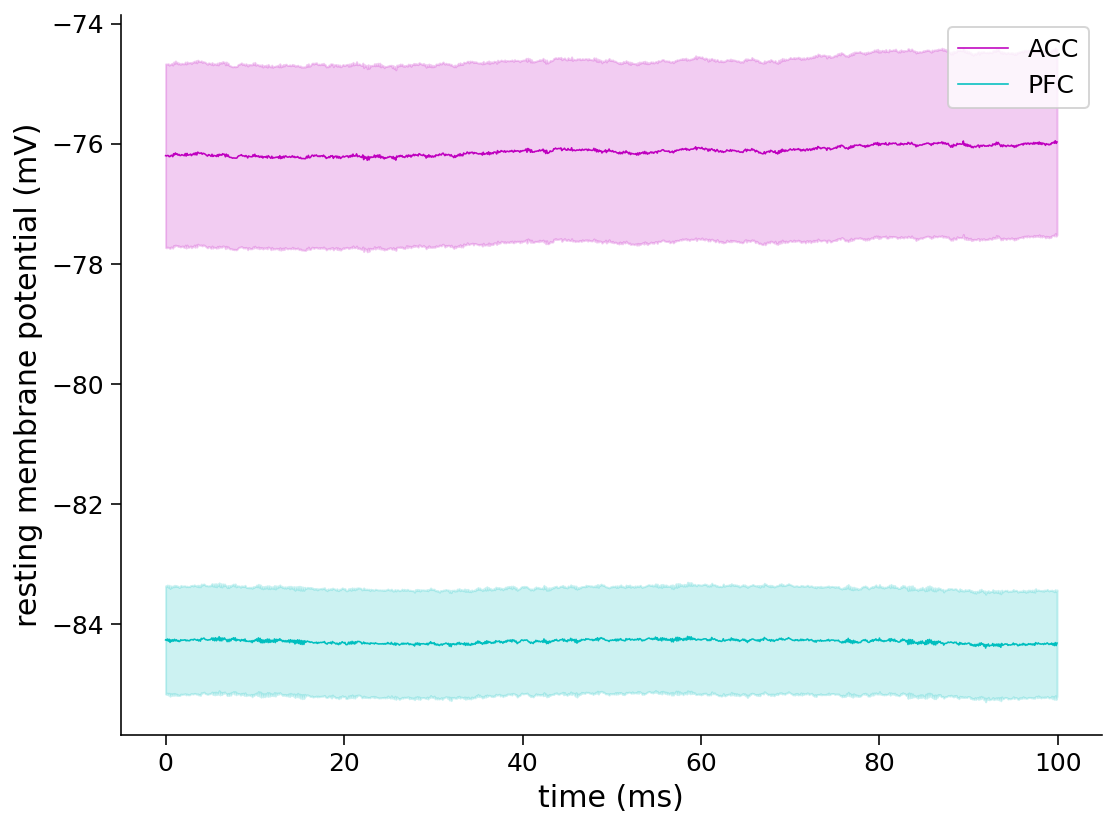

In [40]:
plt.plot(acc_rs['time'][:time_n], rmp_mean_acc, 'm-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'][:time_n], rmp_mean_acc - rmp_sem_acc, rmp_mean_acc + rmp_sem_acc, color='m', alpha=0.2, label='_nolegend_')

plt.plot(acc_rs['time'][:time_n], rmp_mean_ppc, 'c-', label='mean_1', linewidth=0.8)
plt.fill_between(acc_rs['time'][:time_n], rmp_mean_ppc - rmp_sem_ppc, rmp_mean_ppc + rmp_sem_ppc, color='c', alpha=0.2, label='_nolegend_')


plt.ylabel('resting membrane potential (mV)')
plt.xlabel('time (ms)')

plt.legend(['ACC','PFC' ])


plt.show()




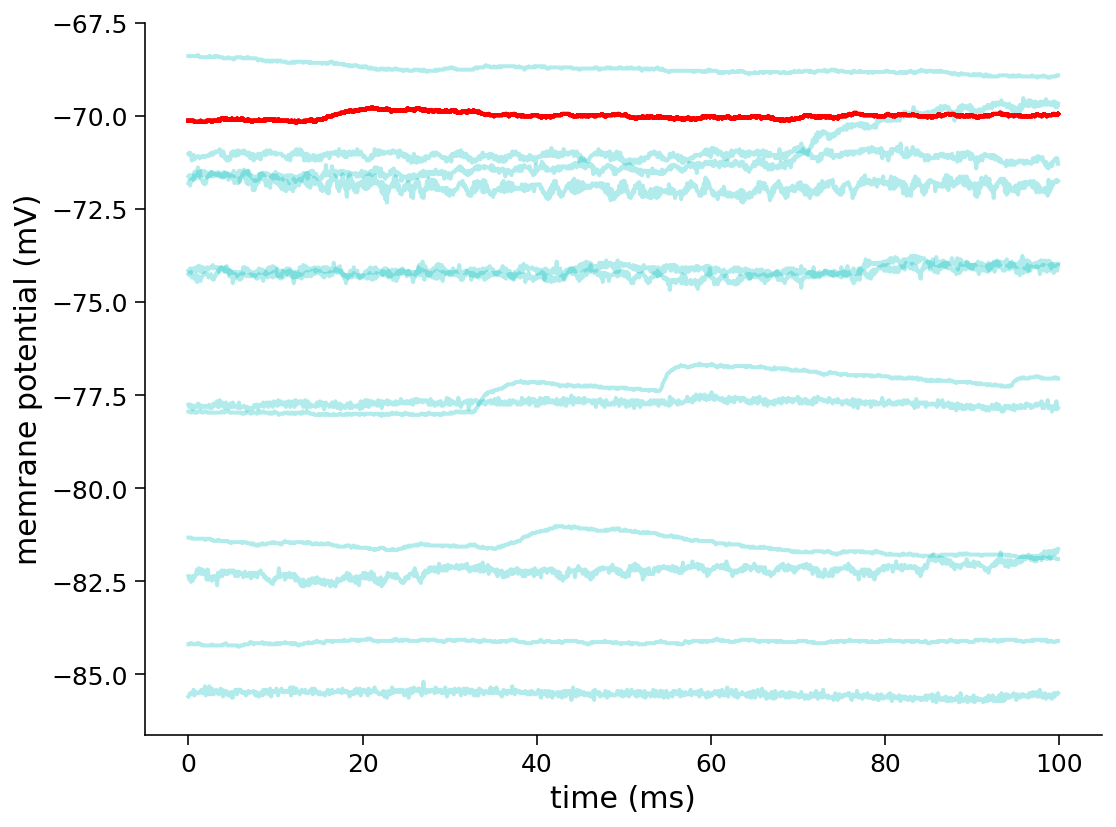

In [43]:
overlap_mp(acc_rs, 0, 1000, 13, 0)


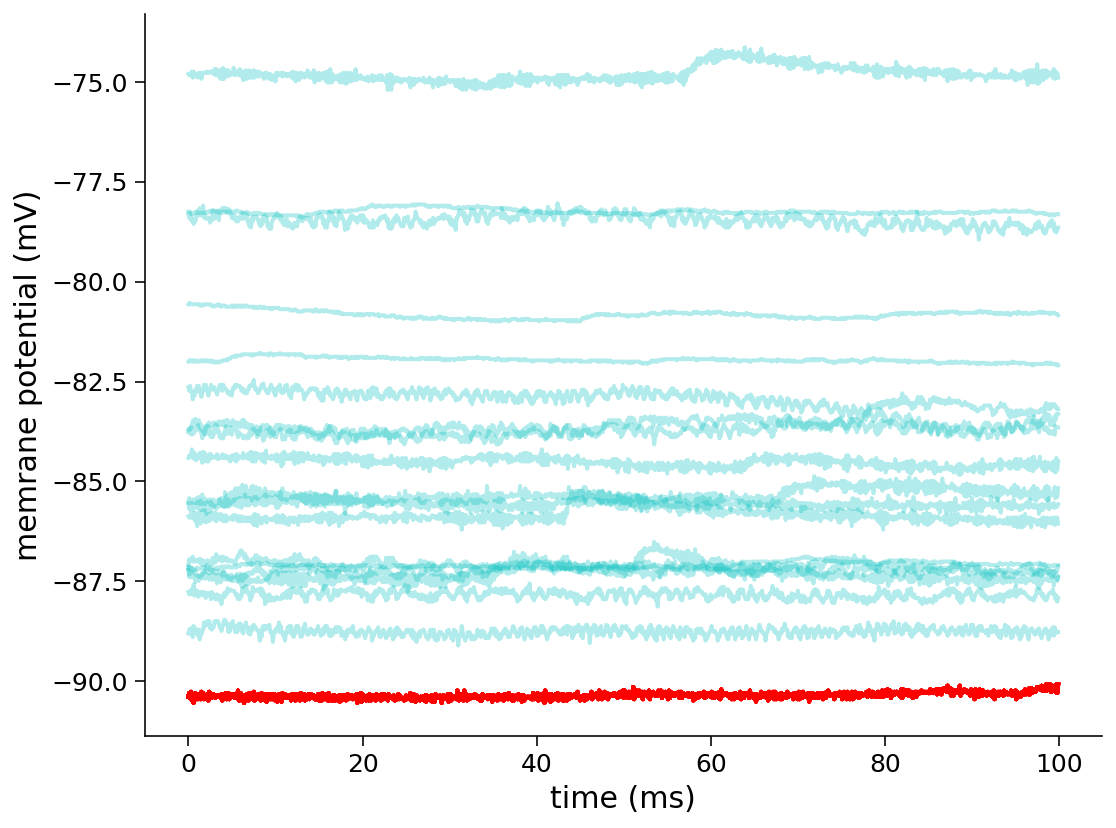

In [44]:
overlap_mp(ppc_rs, 0, 1000, 19, 0)
